# PyBrain Network



In [ ]:
!pip install https://github.com/pybrain/pybrain/archive/0.3.3.zip

In [ ]:
import pybrain

In [ ]:
from pybrain.structure import FeedForwardNetwork
from pybrain.structure import SigmoidLayer, LinearLayer, BiasUnit
from pybrain.structure import FullConnection

#feed forward is standard input to hidden to output
#fullconnection is so that all neurons in one layer is connected to the neurons in the next layer

In [ ]:
network = FeedForwardNetwork()

In [ ]:
#for 2 inputs, so no activation function
input_layer = LinearLayer(2)


#sigmoid 3 neurons hidden layer

hidden_layer = SigmoidLayer(3)

#output 1 neuron

output_layer = SigmoidLayer(1)

#bias unit for hidden layer and then output layer
bias0 = BiasUnit()
bias1 = BiasUnit()

In [ ]:
#add above variables with above network

network.addModule(input_layer)
network.addModule(hidden_layer)
network.addModule(output_layer)
network.addModule(bias0)
network.addModule(bias1)

In [ ]:
#connect input to hidden layer
input_to_hidden = FullConnection(input_layer, hidden_layer)

#connect hidden to output
hidden_to_output = FullConnection(hidden_layer, output_layer)

#add baises

bias_hidden = FullConnection(bias0, hidden_layer)

bias_output = FullConnection(bias1, output_layer)

In [ ]:
#build whole network
network.sortModules()

In [ ]:
#visualize
print(network)

FeedForwardNetwork-10
   Modules:
    [<BiasUnit 'BiasUnit-6'>, <BiasUnit 'BiasUnit-9'>, <LinearLayer 'LinearLayer-5'>, <SigmoidLayer 'SigmoidLayer-7'>, <SigmoidLayer 'SigmoidLayer-8'>]
   Connections:
    []



In [ ]:
#displays input to hidden layer weights - first 3 are from 1st input, 2nd 3 are from 2nd input
print(input_to_hidden.params)
#displays hidden to output layer weights
print(hidden_to_output.params)
#displays biases
print(bias_hidden.params)
print(bias_output.params)

[-0.09837991  0.01079438 -1.69359331  0.85254611 -1.36372221  0.26268664]
[ 1.4807916   1.43792094 -0.11145034]
[0.40856584 0.17001246 0.75844098]
[0.0259064]


We can speed up the process of making a network, lets do so now

In [ ]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer

In [ ]:
from pickle import FALSE
#basic network, with 2 input, 3 hidden layer, 1 output neuron layer with sigmoid function as linearlayer is default
network_1 = buildNetwork(2, 3, 1, outclass = SigmoidLayer, hiddenclass = SigmoidLayer, bias = False)
network_1

<FeedForwardNetwork 'FeedForwardNetwork-63'>

In [ ]:
print(network_1["in"])
print(network_1["hidden0"])
print(network_1["out"]) # <- want sigmoid output
print(network_1["bias"]) # <- no bias

<LinearLayer 'in'>
<SigmoidLayer 'hidden0'>
<SigmoidLayer 'out'>
None


In [ ]:
dataset = SupervisedDataSet(2, 1)  #<- 2 inputs 1 output these makes a sample dataset
dataset.addSample((0,0), (0,))
dataset.addSample((1,0), (1,))
dataset.addSample((0,1), (1,))
dataset.addSample((1,1), (0,))

In [ ]:
print(dataset['input'])
print(dataset['target'])
optimizer = BackpropTrainer(module = network_1, dataset = dataset, learningrate = 0.1)
epochs = 50000
error = []

for epoch in range(epochs):
  error_average = optimizer.train()
  if epoch % 10000 == 0:
    print("Epoch: " + str(epoch+1) + "Error: " + str(error_average))
    error.append(error_average)

[[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]
Epoch: 1Error: 0.05880383034018402
Epoch: 10001Error: 0.04029936184233575
Epoch: 20001Error: 0.009548356279687625
Epoch: 30001Error: 0.0050042642899171055
Epoch: 40001Error: 0.0033181022738949626


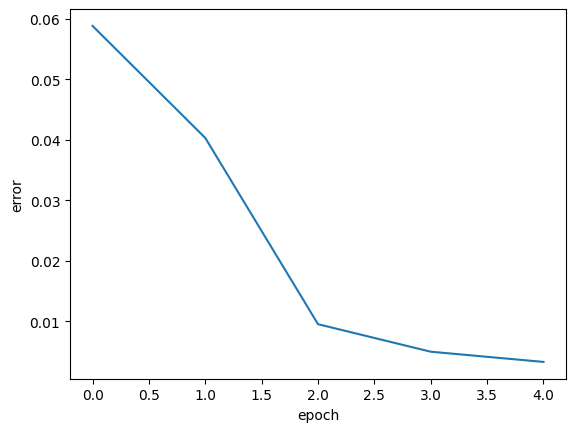

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("error")
plt.plot(error)

In [ ]:
network_1.params
#shows network weights

array([  5.87691721,   6.66202248, -10.55729504,   5.1713495 ,
        -0.58534843,   0.89226924,  11.8464583 ,   8.90900795,
       -25.41616627])

In [ ]:
 #test inputs
print(network_1.activate([0,0]))
print(network_1.activate([0,1]))
#works good nice

[0.08864038]
[0.93467854]


# SK Learn Network

Supports other machine learning models, not just neural networks.

In [ ]:
from sklearn.neural_network import MLPClassifier #multi-layer perceptron
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
inputs = iris.data
iris.feature_names

outputs = iris.target #will give the classifications
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(inputs.shape)
print(outputs.shape) #not necessary to change vector to matrix

(150, 4)
(150,)


In [ ]:
#cross validation we must do on our own
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2) #80% train and 20% test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape) #120 for train, 30 for testing

(120, 4)
(120,)
(30, 4)
(30,)


In [ ]:
from re import VERBOSE
#network training
network = MLPClassifier(max_iter = 3000, verbose = True, tol=0.0000100, activation = "logistic", solver = "adam", learning_rate = "constant",  learning_rate_init=0.001
                        , batch_size=32, hidden_layer_sizes= (4,4))#, early_stopping = True, n_iter_no_change= 50) #can set your own activation functions shown in sci kit learn documentation
network.fit(x_train, y_train)  #adam was the optimizer, learning rate can also have different options
#outputs and inputs don't need to be declared, but whats in hidden layers ought to be declared
#layer size, (4,4) means 4 inputs to 4 hidden layer neurons to again 4 neuron layer again to 3 outputs
#can also set the abort sequence so that if there isn't improvement after x number of epochs, it'll abort and stop

Iteration 1, loss = 1.14630902
Iteration 2, loss = 1.14189256
Iteration 3, loss = 1.13753629
Iteration 4, loss = 1.13337368
Iteration 5, loss = 1.12952569
Iteration 6, loss = 1.12613659
Iteration 7, loss = 1.12276309
Iteration 8, loss = 1.11944679
Iteration 9, loss = 1.11721199
Iteration 10, loss = 1.11380522
Iteration 11, loss = 1.11143899
Iteration 12, loss = 1.10899802
Iteration 13, loss = 1.10697854
Iteration 14, loss = 1.10469547
Iteration 15, loss = 1.10265722
Iteration 16, loss = 1.10146748
Iteration 17, loss = 1.09945511
Iteration 18, loss = 1.09753231
Iteration 19, loss = 1.09578254
Iteration 20, loss = 1.09468135
Iteration 21, loss = 1.09310413
Iteration 22, loss = 1.09162943
Iteration 23, loss = 1.09045835
Iteration 24, loss = 1.08919787
Iteration 25, loss = 1.08776916
Iteration 26, loss = 1.08681597
Iteration 27, loss = 1.08567703
Iteration 28, loss = 1.08423274
Iteration 29, loss = 1.08309017
Iteration 30, loss = 1.08197500
Iteration 31, loss = 1.08091661
Iteration 32, los

MLPClassifier(activation='logistic', batch_size=32, hidden_layer_sizes=(4, 4),
              max_iter=3000, tol=1e-05, verbose=True)

In [ ]:
network.classes_

array([0, 1, 2])

In [ ]:
print(network.coefs_) #uses bias units by default
#related to bias is
print(network.intercepts_)

[array([[ 0.61541992, -0.07029332,  0.82838104, -0.51322894],
       [ 1.18272858, -1.96862363,  1.11335019, -1.05639468],
       [-1.35866696,  2.14293805, -1.36308622,  1.14533998],
       [-2.01186527,  2.10518597, -2.29900489,  1.83404754]]), array([[ 3.91828347, -3.62652294, -2.20593031, -1.68713557],
       [-1.38754541,  1.23384314,  4.98783684,  4.98410975],
       [ 3.55030269, -3.6427958 , -2.02738097, -1.8785996 ],
       [-2.48276786,  2.61756702,  2.90387082,  3.26695107]]), array([[ 3.78840695,  2.12013689, -4.38981979],
       [-2.11835502, -2.75011068,  3.48032131],
       [-4.43811224,  1.46067268,  1.13727449],
       [-4.31831711,  1.67593738,  1.29278464]])]
[array([ 2.42801625, -0.82643583,  1.56622769, -1.86083296]), array([ 0.44613209, -0.49350953,  0.58418212, -0.06233926]), array([ 3.03675567, -0.89829227, -0.12655782])]


In [ ]:
print(network.n_layers_)
print(network.n_outputs_)
print(network.out_activation_) #classification so automatic softmax

4
3
softmax


In [ ]:
predictions = network.predict(x_test)
predictions

array([0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 2])

In [ ]:
y_test

array([0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0,
       0, 1, 0, 0, 1, 1, 1, 2])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, predictions)) #93% accuracy
cm = confusion_matrix(y_test, predictions)
cm

0.9333333333333333


array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]])

In [ ]:
x_test[0], y_test[0]
new = x_test[0].reshape(1,-1)
new

array([[4.8, 3.1, 1.6, 0.2]])

In [ ]:
network.predict(new)#correct prediction

array([0])

# Grid Searching

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    "max_iter" : [1000,2000,5000],
    "activation" : ["logistic", "tanh"],
    "solver" : ["adam", "sgd"],
    "batch_size" : [5,12]
}

#parameters is a dictionary storing a list of the parameters and the values to test out, this
#gets put into the network and it will automatically chose the best parameters from here

In [ ]:
grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters) #test on a MLP network
grid_search.fit(inputs, outputs)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score) #final row shows the best epoch count, activation function, optimizer, and batch size

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

{'activation': 'tanh', 'batch_size': 5, 'max_iter': 2000, 'solver': 'sgd'} 0.9933333333333334


# TensorFlow Network

Googles network library; is used for and supports deep learning, as well as GPU access for faster processing time

In [ ]:
import tensorflow

In [ ]:
tensorflow.__version__ #want ver 2.0 +

'2.12.0'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential #class used to create NN
from tensorflow.keras.layers import Dense #same as fullconnection in pybrain, connect neuron to entire next layer
from keras.utils import np_utils #numpy utilities
from tensorflow.keras.datasets import mnist #mnist data

In [ ]:
#load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Class: 5')

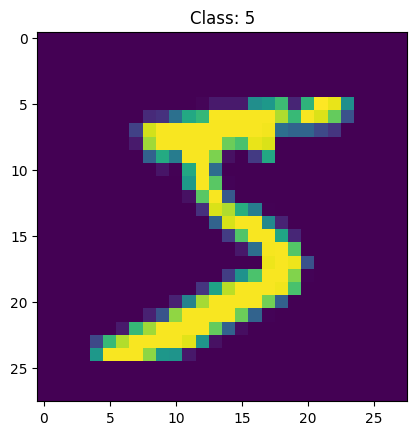

In [ ]:
plt.imshow(X_train[0])
plt.title("Class: " +str(Y_train[0])) #see the images

In [ ]:
X_train.shape #60,000 images, with 28 pixels wide and 28 pixels high, so 784 pixels per image
X_train[0] #looking at the input by itself, first image is 28 matricies with 28 inputs

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train = X_train.reshape(60000, 28*28)
X_train.shape #now only have 1 direction so network input is composed of 784 neurons
X_train[0] #see the actual pixel makeup closer to 0 the darker, the closer to 255 the brighter
#now the input is just 1 matrix of 784

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
X_test = X_test.reshape(10000, 28*28)
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
#want to normalize to make the processesing of data faster
#change to float first
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

#divide by 255 to normalize
X_train /= 255
X_test /= 255

X_train.max()

1.0

In [ ]:
#Y_train is correct response for each X_train
Y_train
#since we have 0-9 numbers to identify we'll want 10 neurons in the output layer

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
Y_train = np_utils.to_categorical(Y_train)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y_test = np_utils.to_categorical(Y_test)


Network Training

In [ ]:
(784 + 10)/2

#397 neurons in hidden layer

397.0

In [ ]:
#structure is: 784 -> 397 (hidden) -> 397 (hidden) -> 10 (output)
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation ="relu"))
network.add(Dense(units = 397, activation ="relu"))
network.add(Dense(units = 10, activation ="softmax"))

In [ ]:
network.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"]) #loss functions shown in keras/tensorflow documentation # adam is stochastic gradient descent method

In [ ]:
history = network.fit(X_train, Y_train, batch_size = 128, epochs = 10) #batch size is that "k fold gradient descent"
#messed up cause y output is bad

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2251 - accuracy: 0.9337
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0824 - accuracy: 0.9751
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0546 - accuracy: 0.9829
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0381 - accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0203 - accuracy: 0.9932
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0175 - accuracy: 0.9941
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0129 - accuracy: 0.9955
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0131 - accuracy: 0.995

 Network Evaluation

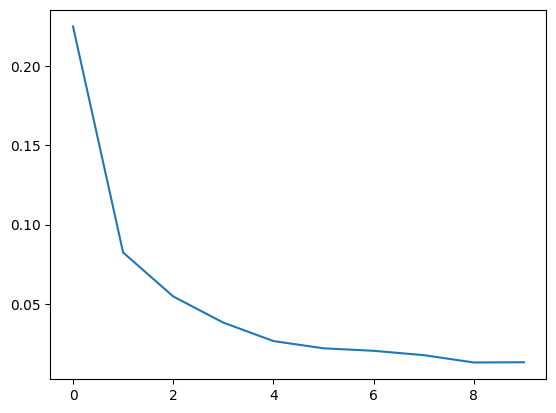

In [ ]:
#can get history of training
history.history.keys()
plt.plot(history.history['loss'])

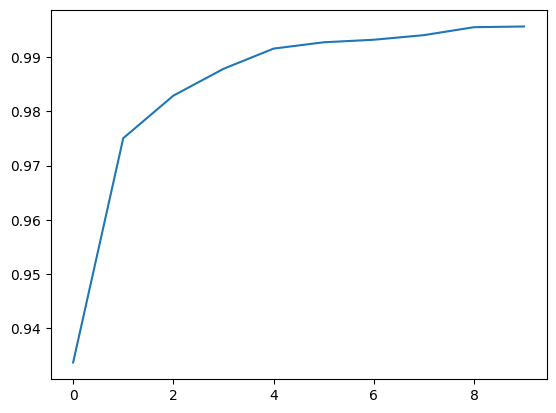

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
accuracy_test = network.evaluate(X_test, Y_test) #98 % accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9792


In [ ]:
predictions = network.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0] #10 values, 1 value for each of the neurons

array([2.4377793e-13, 2.2570462e-10, 6.9518401e-12, 1.8399010e-09,
       1.9897617e-15, 7.3961094e-14, 6.7543614e-19, 9.9999994e-01,
       4.1375903e-13, 1.4369314e-09], dtype=float32)

Class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


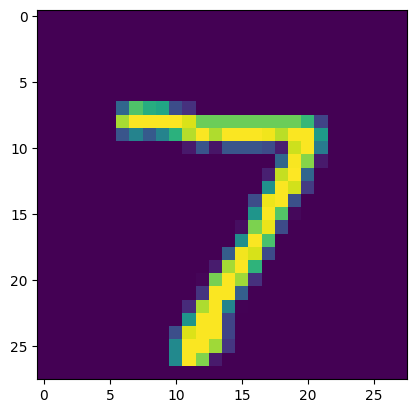

In [ ]:
plt.imshow(X_test[0].reshape(28,28))
print("Class: " + str(Y_test[0])) #looking at the prediction outputs, largest probability is in position 7 from network, so this matches
print(np.argmax(predictions[0]))

# PyTorch Network

Has support for convolutional networks and recurrent networks. Deep Learning is supported, and has GPU support; is an alternative to TensorFlow.

In [ ]:
import torch

In [ ]:
torch.__version__
#cu indicates support for GPU's

'2.0.1+cu118'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn #means Neural Network and has the main functionalities

In [ ]:
breast = datasets.load_breast_cancer()

In [ ]:
breast.data
breast.feature_names #all numeric

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
breast.target #Binary classification of malignant or not tumor
breast.target_names

inputs = breast.data
inputs.shape #30 columns 569 rows

outputs = breast.target
outputs.shape

(569,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.25) #25% for testing 75% learning, so 426 train and 143 test sets
#we need to transform the data: pytorch has a unique variable to train the network

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

<ipython-input-71-0e87e75edc60>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float)
<ipython-input-71-0e87e75edc60>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float)


In [ ]:
type(x_train) #good to go

torch.Tensor

In [ ]:
#need to use another dataset for pytorch
dataset = torch.utils.data.TensorDataset(x_train, y_train)
type(dataset) #good format

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10) #train_loader goes through instances while training and is the k-fold gradient descent

In [ ]:
#30 neurons input -> 16 neurons -> 16 more neurons -> 1 neuron output layer
network = nn.Sequential(nn.Linear(in_features = 30, out_features = 16), nn.Sigmoid(), nn.Linear(16,16), nn.Sigmoid(), nn.Linear(16, 1), nn.Sigmoid()) #can apply activation function
#structure is now done

In [ ]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
#now for loss function: binary cross entropy loss
loss_function = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)
epochs = 100
for epoch in range(epochs):
  running_loss = 0
  for data in train_loader:
    inputs, outputs = data
    print(inputs)
    print("----")
    print(outputs)
    optimizer.zero_grad()

    predictions = network.forward(inputs)
    loss = loss_function(predictions, outputs)
    loss.backwards()
    optimizer.step()

    running_loss += loss.item()
  print("Epoch: " + str(epoch +1) + "loss: " + str(running_loss/len(train_loader)))

tensor([[1.3170e+01, 1.8660e+01, 8.5980e+01, 5.3460e+02, 1.1580e-01, 1.2310e-01,
         1.2260e-01, 7.3400e-02, 2.1280e-01, 6.7770e-02, 2.8710e-01, 8.9370e-01,
         1.8970e+00, 2.4250e+01, 6.5320e-03, 2.3360e-02, 2.9050e-02, 1.2150e-02,
         1.7430e-02, 3.6430e-03, 1.5670e+01, 2.7950e+01, 1.0280e+02, 7.5940e+02,
         1.7860e-01, 4.1660e-01, 5.0060e-01, 2.0880e-01, 3.9000e-01, 1.1790e-01],
        [2.1160e+01, 2.3040e+01, 1.3720e+02, 1.4040e+03, 9.4280e-02, 1.0220e-01,
         1.0970e-01, 8.6320e-02, 1.7690e-01, 5.2780e-02, 6.9170e-01, 1.1270e+00,
         4.3030e+00, 9.3990e+01, 4.7280e-03, 1.2590e-02, 1.7150e-02, 1.0380e-02,
         1.0830e-02, 1.9870e-03, 2.9170e+01, 3.5590e+01, 1.8800e+02, 2.6150e+03,
         1.4010e-01, 2.6000e-01, 3.1550e-01, 2.0090e-01, 2.8220e-01, 7.5260e-02],
        [1.4190e+01, 2.3810e+01, 9.2870e+01, 6.1070e+02, 9.4630e-02, 1.3060e-01,
         1.1150e-01, 6.4620e-02, 2.2350e-01, 6.4330e-02, 4.2070e-01, 1.8450e+00,
         3.5340e+00, 3.100

ValueError: ignored

In [ ]:
network.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
x_test = torch.tensor(x_test, dtype = torch.float)

In [ ]:
predictions = network.forward(x_test)
predictions #close to 1 is cancer bad, closer to 0 is not as bad cancer

tensor([[0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5202],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5204],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5204],
        [0.5204],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0.5203],
        [0

In [ ]:
predictions  = np.array(predictions > 0.5)


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
print(accuracy_score(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
cm

0.6223776223776224


array([[ 0, 54],
       [ 0, 89]])